In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
def get_one_csv(cvs_id, filepath):
    file_path = os.getcwd()+'\\'+filepath+'\\'+str(cvs_id)+'.csv'
    csv_data = pd.read_csv(open(file_path), usecols=[0,5],encoding='utf-8')
    csv_data = np.array(csv_data)
    return csv_data

def get_valid_data(csv_id, filepath):
    #找触电点步长
    point_find_step = 1
    threshold = 1.0
    #for i in range(csv_id1,csv_id2):
    Data = []
    file_path = os.getcwd()+'\\'+filepath+'\\'+str(csv_id)+'.csv'
    csv_data = pd.read_csv(open(file_path), usecols=[0,5],encoding='utf-8') 
    csv_data = np.array(csv_data)
    left, right = 0, len(csv_data) - 1
    while left < right:
        if abs(csv_data[left,1]) > threshold:
            break
        left = left + point_find_step
    while right > left:
        if abs(csv_data[right,1]) > threshold:
            break
        right = right - point_find_step
    Data.extend(csv_data[left:right+1])
    Data = np.array(Data)
    Data = Data.reshape(-1,2)
    return Data

def cal(Data):
    mean = np.mean(Data, axis=0)
    var = np.var(Data, axis=0)
    return mean, var

mean = []
var = []
xtype = []
#兔子数据
for i in range(131,191):
    Data = get_one_csv(i, '兔子数据')
    meantemp, vartemp = cal(Data[:,1])
    mean.append(meantemp)
    var.append(vartemp)
    xtype.append(1)
#小羊数据
for i in range(359,410):
    Data = get_one_csv(i, '小羊数据')
    meantemp, vartemp = cal(Data[:,1])
    mean.append(meantemp)
    var.append(vartemp)
    xtype.append(2)

df = pd.DataFrame({'mean':mean, 'var':var, 'type':xtype})
cols=['mean','var','type']
#将DataFrame存储为csv,index表示是否显示行名，default=True
df.to_csv("mean_and_var2.csv",index=True,sep=',',columns=cols)

In [4]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import random

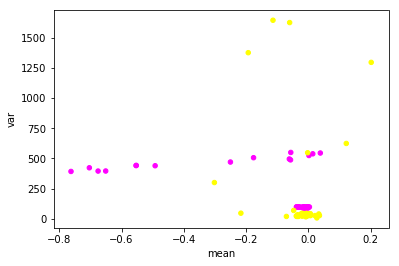

In [5]:
X = np.zeros((len(mean), 2))
X[:,0], X[:,1] = mean, var

plt.scatter(X[:,0], X[:,1], c=xtype, s=20, cmap='spring')
plt.xlabel("mean")
plt.ylabel("var")
X_train, X_test, y_train, y_test = train_test_split(X, xtype, test_size=0.3)

In [6]:
#线性归一化后,效果不好。
#X_normal = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
# X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_normal, xtype, test_size=0.3)
# plt.scatter(X_normal[:,0], X_normal[:,1], c=xtype, s=20, cmap='spring')

In [7]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
print('train score =',svc.score(X_train, y_train))
y_predict = svc.predict(X_test)
print('test score =',svc.score(X_test, y_test))
print('y_test: ',y_test)
print('y_predict: ',y_predict)

train score = 0.935064935065
test score = 0.705882352941
y_test:  [2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2]
y_predict:  [1 2 2 1 2 2 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2]


In [8]:
rfc = RandomForestClassifier(n_estimators=20, criterion="entropy")
rfc.fit(X_train, y_train)
print('train score =',rfc.score(X_train, y_train))
y_predict = svc.predict(X_test)
print('test score =',rfc.score(X_test, y_test))
print('y_test: ',y_test)
print('y_predict: ',y_predict)

train score = 1.0
test score = 0.764705882353
y_test:  [2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2]
y_predict:  [1 2 2 1 2 2 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2]
